**CNNによる2次元顔画像表情判定**

In [2]:
!ps aux
!kill -9 <pid>

USER         PID %CPU %MEM    VSZ   RSS TTY      STAT START   TIME COMMAND
root           1  0.0  0.0    992     4 ?        Ss   00:19   0:00 /sbin/docker-
root           9  0.0  0.3 337508 47644 ?        Sl   00:19   0:00 /tools/node/b
root          19  0.0  0.0  35888  4760 ?        Ss   00:19   0:00 tail -n +0 -F
root          42  0.0  0.3 160352 41776 ?        S    00:19   0:00 python3 /usr/
root          55  0.1  0.4 193892 60320 ?        Sl   00:19   0:01 /usr/bin/pyth
root          56  0.0  0.0 706824  6044 ?        Sl   00:19   0:00 /usr/local/bi
root          67 24.6  2.9 2040568 389304 ?      Ssl  00:40   0:04 /usr/bin/pyth
root          87  0.2  0.1 127644 14616 ?        Sl   00:40   0:00 /usr/bin/pyth
root         109  0.0  0.0  59036  6360 ?        R    00:40   0:00 ps aux
/bin/bash: -c: line 0: syntax error near unexpected token `newline'
/bin/bash: -c: line 0: `kill -9 <pid>'


In [3]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [4]:
import os
import keras
from keras.preprocessing.image import ImageDataGenerator
from keras.models import Sequential, Model
from keras.layers import Input, Dense, Dropout, Activation, Flatten,MaxPooling2D,Conv2D
from keras import optimizers
from tensorflow.keras.optimizers import RMSprop
from tensorflow.keras.optimizers import Adam

**訓練画像、検証画像、テスト画像のディレクトリ**

In [5]:
classes = ['angry', 'disgust','fear','happy','neutral','sad','surprise']
nb_classes = len(classes)
batch_size_for_data_generator = 20

base_dir = '/content/drive/MyDrive/kaggle/Facial Experience'

train_dir = base_dir+'/train'
validation_dir = base_dir+'/valid'
test_dir = base_dir+'/test'

img_rows, img_cols = 48, 48

os.path.join(base_dir,'path')

**ImageDataGeneratorを使って画像データを拡張する**

In [7]:
train_datagen = ImageDataGenerator(rescale=1.0 / 255)
train_generator = train_datagen.flow_from_directory(directory=train_dir,
                                                    target_size=(img_rows, img_cols),
                                                    color_mode='rgb',
                                                    classes=classes,
                                                    class_mode='categorical',
                                                    batch_size=2048,
                                                    shuffle=True)

Found 93005 images belonging to 7 classes.


train 93005枚
5x11x19x89

In [8]:
valid_datagen = ImageDataGenerator(rescale=1.0 / 255)
validation_generator = valid_datagen.flow_from_directory(directory=validation_dir,
                                                        target_size=(img_rows, img_cols),
                                                        color_mode='rgb',
                                                        classes=classes,
                                                        class_mode='categorical',
                                                        batch_size=256,
                                                        shuffle=True)

Found 17376 images belonging to 7 classes.


valid 17376枚

**CNNモデル**

出力層
二値分類→sigmoid
他クラス分類→softmax
回帰分類→恒等関数

In [9]:
model=Sequential()
# 畳み込み層
model.add(Conv2D(32, (3, 3), activation='relu',input_shape=(img_rows, img_cols, 3)))
model.add(MaxPooling2D((2, 2)))

model.add(Dropout(0.2))

model.add(Conv2D(64, (3, 3), activation='relu'))
model.add(MaxPooling2D((2, 2)))

model.add(Dropout(0.2))

model.add(Conv2D(128, (3, 3), activation='relu'))
model.add(MaxPooling2D((2, 2)))

model.add(Dropout(0.2))

model.add(Conv2D(128, (3, 3), activation='relu'))
model.add(MaxPooling2D((2, 2)))

model.add(Dropout(0.2))

# 全結合層
model.add(Flatten())
model.add(Dense(128, activation='relu'))

model.add(Dropout(0.2))

# 出力層
model.add(Dense(nb_classes, activation='softmax'))
          
model.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d (Conv2D)              (None, 46, 46, 32)        896       
_________________________________________________________________
max_pooling2d (MaxPooling2D) (None, 23, 23, 32)        0         
_________________________________________________________________
dropout (Dropout)            (None, 23, 23, 32)        0         
_________________________________________________________________
conv2d_1 (Conv2D)            (None, 21, 21, 64)        18496     
_________________________________________________________________
max_pooling2d_1 (MaxPooling2 (None, 10, 10, 64)        0         
_________________________________________________________________
dropout_1 (Dropout)          (None, 10, 10, 64)        0         
_________________________________________________________________
conv2d_2 (Conv2D)            (None, 8, 8, 128)         7

In [10]:
opt = Adam(lr=0.001, decay=1e-6)
model.compile(loss='categorical_crossentropy',optimizer= opt, metrics=['acc'])

/usr/local/lib/python3.7/dist-packages/keras/optimizer_v2/optimizer_v2.py:356: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  "The `lr` argument is deprecated, use `learning_rate` instead.")


**コールバックを使った学習**

In [11]:
hdf5_file = os.path.join(base_dir, 'model.hdf5')

In [12]:
model.load_weights(hdf5_file)

再度ここから

In [13]:
from keras.callbacks import ModelCheckpoint
modelCheckpoint = ModelCheckpoint(filepath = hdf5_file,
                                  monitor='loss',
                                  verbose=1,
                                  save_best_only=True,
                                  save_weights_only=False,
                                  mode='min',
                                  period=1)

In [14]:
history = model.fit(train_generator,
                    steps_per_epoch=45,
                    epochs=5,
                    validation_data=validation_generator,
                    validation_steps=67,
                    callbacks=[modelCheckpoint],
                    verbose=1)

Epoch 1/5
45/45 [==============================] - 23195s 517s/step - loss: 0.9295 - acc: 0.6683 - val_loss: 1.3183 - val_acc: 0.5334

Epoch 00001: loss improved from inf to 0.92949, saving model to /content/drive/MyDrive/kaggle/Facial Experience/model.hdf5
Epoch 2/5
45/45 [==============================] - 496s 11s/step - loss: 0.9087 - acc: 0.6775 - val_loss: 1.2836 - val_acc: 0.5408

Epoch 00002: loss improved from 0.92949 to 0.90866, saving model to /content/drive/MyDrive/kaggle/Facial Experience/model.hdf5
Epoch 3/5
45/45 [==============================] - 466s 10s/step - loss: 0.9048 - acc: 0.6781 - val_loss: 1.3090 - val_acc: 0.5386

Epoch 00003: loss improved from 0.90866 to 0.90484, saving model to /content/drive/MyDrive/kaggle/Facial Experience/model.hdf5
Epoch 4/5
45/45 [==============================] - 461s 10s/step - loss: 0.9048 - acc: 0.6764 - val_loss: 1.3160 - val_acc: 0.5378

Epoch 00004: loss improved from 0.90484 to 0.90477, saving model to /content/drive/MyDrive/k

In [15]:
model.save(hdf5_file)

In [16]:
import matplotlib.pyplot as plt

In [17]:
%matplotlib inline

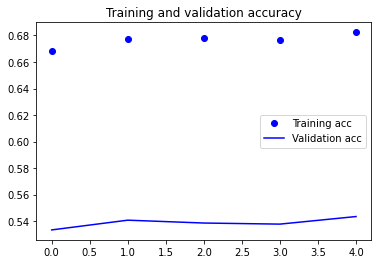

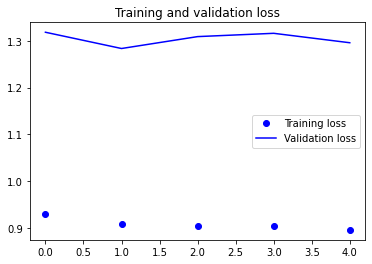

In [18]:
acc = history.history['acc']
val_acc = history.history['val_acc']
loss = history.history['loss']
val_loss = history.history['val_loss']

epochs = range(len(acc))

plt.plot(epochs, acc, 'bo', label='Training acc')
plt.plot(epochs, val_acc, 'b', label='Validation acc')
plt.title('Training and validation accuracy')
plt.legend()

plt.figure()

plt.plot(epochs, loss, 'bo', label='Training loss')
plt.plot(epochs, val_loss, 'b', label='Validation loss')
plt.title('Training and validation loss')
plt.legend()

plt.show()

**テスト**

In [19]:
# test_datagen = ImageDataGenerator(rescale=1.0 / 255)

In [20]:
# model=keras.models.load_model(hdf5_file)

In [21]:
# import numpy as np
# test_generator = test_datagen.flow_from_directory(directory=test_dir,
#                                                   target_size=(img_rows, img_cols),
#                                                   color_mode='rgb',
#                                                   classes=classes,
#                                                   class_mode='categorical',
#                                                   batch_size=32,
#                                                   shuffle=False)

# test_steps_per_Epoch = np.math.ceil(test_generator.samples / test_generator.batch_size)

In [22]:
# predictions = model.predict_generator(test_generator, steps=test_steps_per_Epoch)
# # Get most likely class
# predicted_classes = np.argmax(predictions, axis=1)
# # Ground-Truthクラスとクラスラベルを取得する
# true_classes = test_generator.classes
# class_labels = list(test_generator.class_indices.keys())

In [23]:
# from sklearn import metrics
# # scikit-learnを使用して統計を取得する
# report = metrics.classification_report(true_classes, 
#                                        predicted_classes, 
#                                        labels=np.arange(len(classes)),
#                                        target_names=classes)
# print(report)

正解率（accuracy）: accuracy_score()

適合率（precision）: precision_score()

再現率（recall）: recall_score()

F1値（F1-measure）: f1_score()

**混同行列**


In [24]:
# from sklearn.metrics import confusion_matrix,ConfusionMatrixDisplay

# Y_pred = model.predict_generator(test_generator, test_steps_per_Epoch)
# y_pred = np.argmax(Y_pred, axis=1)
# print("Confusion Matrix")
# # confusion matrixの作成
# cm = confusion_matrix(test_generator.classes, y_pred)
# #表示
# cmd = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=classes)
# fig, ax = plt.subplots(figsize=(10, 10))
# cmd.plot(ax=ax, cmap="Blues")

**参考**


*   [Keras / CNN] 多クラス画像分類 --- ラーメンの味分類

    https://qiita.com/Phoeboooo/items/cfe8560fe8a285855340
*   リスト項目

